In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [284]:
train = pd.read_csv('dacon_bda/train.csv')
test = pd.read_csv('dacon_bda/test.csv')

In [285]:
train.head()

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,class2,class3,class4,re_registration,contest_award,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,previous_class_3,previous_class_4,previous_class_5,previous_class_6,previous_class_7,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,certificate_study_period,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,contest_participitation,idea_contest,onedayclass_topic,withdrawal
0,TRAIN_0000,8,3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...,단일 전공,IT(컴퓨터 공학 포함),NaN,False,대학생,4,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",프로젝트 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,공학 (컴퓨터 공학 제외),취업,대학교 이수학기 4학기 이하,팀,4.5,데이터 엔지니어,없음,"SQLD, 정보처리기사",시험일 전 4주 (2/1 ~ 2/27),개발,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 많지 않아야 편하게 들을 수 있어서,삼성이나 하이닉스,AI,NaN,NaN,C++ 응용,1
1,TRAIN_0001,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,4,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,IT (컴퓨터 공학 포함),취업,대학교 이수학기 5학기 이상,팀,2.0,인공지능 전문가,없음,"ADsP, SQLD, 빅데이터 분석 기사",시험일 전 4주 (2/1 ~ 2/27),AI,주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있고 질문 하기 쉽다.,네이버,AI,NaN,NaN,.,1
2,TRAIN_0002,8,1ed9296bd2a05ea36fabb5171a003b7320bb21a53d6135...,단일 전공,IT(컴퓨터 공학 포함),NaN,True,대학생,4,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,IT (컴퓨터 공학 포함),취업,대학교 이수학기 4학기 이하,팀,3.0,데이터 분석가,없음,빅데이터 분석 기사,시험일 전 4주 (2/1 ~ 2/27),AI,시니어 (10년차 ~),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 소수인원은 조금 부담스럽고 너무 많은 인원은 집중도가 떨어질거같아서,스포츠분석 기업,AI,139ac02d03d83f839197195e65bc1810ef5282ade32d80...,NaN,C언어 기초,1
3,TRAIN_0003,8,5ec50ef5a0c0416652f8d67a89ef4c02eb0c6a61b5d0a8...,단일 전공,IT(컴퓨터 공학 포함),NaN,True,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,현직자의 강의를 듣고 싶어서,데이터 분석 역량,네. 온라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,자연과학,취업,대학교 이수학기 5학기 이상,팀,2.0,데이터 분석가,컴퓨터활용능력,"ADsP, SQLD, 빅데이터 분석 기사, 정보처리기사",시험일 전 4주 (2/1 ~ 2/27),AI,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,너무 많은 인원이 있을 경우 집중도가 떨어질 거 같습니다.,토스,AI,NaN,NaN,현직자의 취업과정,0
4,TRAIN_0004,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,7,NaN,NaN,NaN,아니요,NaN,내국인,에브리타임,혼자 공부하기 어려워서,공모전 경험,네. 오프라인으로 참여하고 싶어요,NaN,NaN,NaN,NaN,NaN,"IT (컴퓨터 공학 포함), 인문학",취업,대학교 이수학기 5학기 이상,팀,1.5,데이터 분석가,SQLD,"ADsP, 빅데이터 분석 기사, 정보처리기사",시험일 전 4주 (2/1 ~ 2/27),개발,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)",오프라인,100명 이상의 리스너와 10명 이상의 현직자,많은 현직자분들의 이야기를 듣고싶어서,네이버 카카오,금융,NaN,NaN,C언어,1


In [286]:
# 각 열에서 결측치가 차지하는 비율
train.isnull().mean()

ID                                 0.000000
generation                         0.000000
school1                            0.000000
major type                         0.006629
major1_1                           0.004735
major1_2                           0.533144
major_data                         0.000000
job                                0.000000
class1                             0.000000
class2                             0.904356
class3                             0.998106
class4                             0.999053
re_registration                    0.000000
contest_award                      0.989583
nationality                        0.000000
inflow_route                       0.000000
whyBDA                             0.000000
what_to_gain                       0.010417
hope_for_group                     0.010417
previous_class_3                   0.836174
previous_class_4                   0.837121
previous_class_5                   0.837121
previous_class_6                

In [287]:
# 결측치 비율 80% 이상이면 컬럼 삭제
missing_ratio = train.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > 0.8].index.tolist()

train = train.drop(columns=columns_to_drop, axis=1)
test = test.drop(columns=columns_to_drop, axis=1)

train.head(2)

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,re_registration,nationality,inflow_route,whyBDA,what_to_gain,hope_for_group,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,certificate_study_period,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,onedayclass_topic,withdrawal
0,TRAIN_0000,8,3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...,단일 전공,IT(컴퓨터 공학 포함),NaN,False,대학생,4,아니요,내국인,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",프로젝트 경험,네. 오프라인으로 참여하고 싶어요,공학 (컴퓨터 공학 제외),취업,대학교 이수학기 4학기 이하,팀,4.5,데이터 엔지니어,없음,"SQLD, 정보처리기사",시험일 전 4주 (2/1 ~ 2/27),개발,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 많지 않아야 편하게 들을 수 있어서,삼성이나 하이닉스,AI,C++ 응용,1
1,TRAIN_0001,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,4,아니요,내국인,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,IT (컴퓨터 공학 포함),취업,대학교 이수학기 5학기 이상,팀,2.0,인공지능 전문가,없음,"ADsP, SQLD, 빅데이터 분석 기사",시험일 전 4주 (2/1 ~ 2/27),AI,주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있고 질문 하기 쉽다.,네이버,AI,.,1


In [288]:
train.isnull().any()

ID                                 False
generation                         False
school1                            False
major type                          True
major1_1                            True
major1_2                            True
major_data                         False
job                                False
class1                             False
re_registration                    False
nationality                        False
inflow_route                       False
whyBDA                             False
what_to_gain                        True
hope_for_group                      True
major_field                         True
desired_career_path                 True
completed_semester                  True
project_type                        True
time_input                         False
desired_job                         True
certificate_acquisition            False
desired_certificate                 True
certificate_study_period            True
desired_job_exce

In [289]:
# 남은 컬럼 중에 결측치는 최빈값 대체
missing_cols = train.columns[train.isnull().any()].tolist()

for col in missing_cols:
    mode_value = train[col].mode()[0]
    train[col] = train[col].fillna(mode_value)
    test[col] = test[col].fillna(mode_value)

In [290]:
train['is_major_it'] = train['major_field'].str.contains('IT', regex=True).astype(int)
test['is_major_it'] = test['major_field'].str.contains('IT', regex=True).astype(int)

In [249]:
train.head(2).T

,0,1
ID,TRAIN_0000,TRAIN_0001
generation,8,8
school1,3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...
major type,단일 전공,"복수 전공 ( 다중전공, 이중전공 포함 )"
major1_1,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함)
major1_2,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함)
major_data,False,False
job,대학생,대학생
class1,4,4
re_registration,아니요,아니요


In [291]:
# 국적변수 탈락
train = train.drop(columns = 'nationality', axis = 1)
test = test.drop(columns = 'nationality', axis = 1)

In [292]:
binary_columns = [col for col in train.columns if len(set(train[col].dropna().unique())) == 2]
binary_columns = binary_columns[: -2] + binary_columns[-1:] # withdrawal 컬럼 삭제
binary_columns

['major type',
 'major_data',
 're_registration',
 'completed_semester',
 'project_type',
 'certificate_study_period',
 'incumbents_level',
 'is_major_it']

In [293]:
cate_columns = [col for col in train.columns if col not in binary_columns]
cate_columns = cate_columns[:-1] # withdrawal 컬럼 삭제
cate_columns = cate_columns[1:] # ID 컬럼 삭제
cate_columns

['generation',
 'school1',
 'major1_1',
 'major1_2',
 'job',
 'class1',
 'inflow_route',
 'whyBDA',
 'what_to_gain',
 'hope_for_group',
 'major_field',
 'desired_career_path',
 'time_input',
 'desired_job',
 'certificate_acquisition',
 'desired_certificate',
 'desired_job_except_data',
 'incumbents_lecture',
 'incumbents_company_level',
 'incumbents_lecture_type',
 'incumbents_lecture_scale',
 'incumbents_lecture_scale_reason',
 'interested_company',
 'expected_domain',
 'onedayclass_topic']

In [294]:
for col in train.columns:
    print(col,'의 고유한 값은', train[col].nunique())

ID 의 고유한 값은 1056
generation 의 고유한 값은 1
school1 의 고유한 값은 77
major type 의 고유한 값은 2
major1_1 의 고유한 값은 11
major1_2 의 고유한 값은 11
major_data 의 고유한 값은 2
job 의 고유한 값은 4
class1 의 고유한 값은 9
re_registration 의 고유한 값은 2
inflow_route 의 고유한 값은 9
whyBDA 의 고유한 값은 7
what_to_gain 의 고유한 값은 9
hope_for_group 의 고유한 값은 3
major_field 의 고유한 값은 51
desired_career_path 의 고유한 값은 27
completed_semester 의 고유한 값은 2
project_type 의 고유한 값은 2
time_input 의 고유한 값은 18
desired_job 의 고유한 값은 90
certificate_acquisition 의 고유한 값은 37
desired_certificate 의 고유한 값은 108
certificate_study_period 의 고유한 값은 2
desired_job_except_data 의 고유한 값은 35
incumbents_level 의 고유한 값은 2
incumbents_lecture 의 고유한 값은 8
incumbents_company_level 의 고유한 값은 22
incumbents_lecture_type 의 고유한 값은 3
incumbents_lecture_scale 의 고유한 값은 11
incumbents_lecture_scale_reason 의 고유한 값은 985
interested_company 의 고유한 값은 531
expected_domain 의 고유한 값은 68
onedayclass_topic 의 고유한 값은 540
withdrawal 의 고유한 값은 2
is_major_it 의 고유한 값은 2


In [295]:
for col in test.columns:
    print(col,'의 고유한 값은', test[col].nunique())

ID 의 고유한 값은 788
generation 의 고유한 값은 1
school1 의 고유한 값은 93
major type 의 고유한 값은 5
major1_1 의 고유한 값은 11
major1_2 의 고유한 값은 11
major_data 의 고유한 값은 2
job 의 고유한 값은 4
class1 의 고유한 값은 12
re_registration 의 고유한 값은 2
inflow_route 의 고유한 값은 8
whyBDA 의 고유한 값은 7
what_to_gain 의 고유한 값은 10
hope_for_group 의 고유한 값은 3
major_field 의 고유한 값은 44
desired_career_path 의 고유한 값은 4
completed_semester 의 고유한 값은 16
project_type 의 고유한 값은 2
time_input 의 고유한 값은 14
desired_job 의 고유한 값은 176
certificate_acquisition 의 고유한 값은 30
desired_certificate 의 고유한 값은 93
certificate_study_period 의 고유한 값은 6
desired_job_except_data 의 고유한 값은 103
incumbents_level 의 고유한 값은 2
incumbents_lecture 의 고유한 값은 10
incumbents_company_level 의 고유한 값은 17
incumbents_lecture_type 의 고유한 값은 3
incumbents_lecture_scale 의 고유한 값은 8
incumbents_lecture_scale_reason 의 고유한 값은 726
interested_company 의 고유한 값은 447
expected_domain 의 고유한 값은 178
onedayclass_topic 의 고유한 값은 45
is_major_it 의 고유한 값은 2


In [362]:
train['completed_semester'].unique()

array(['대학교 이수학기 4학기 이하', '대학교 이수학기 5학기 이상'], dtype=object)

In [372]:
test['completed_semester'].unique()

array(['대학교 이수학기 5학기 이상', '대학교 이수학기 4학기 이하'], dtype=object)

In [369]:
test['completed_semester'] = test['completed_semester'].astype(str)

#### 변수 노가다

In [298]:
test.loc[test['what_to_gain'] == '사실 한가지를 고르기 어렵습니다..ㅠㅠ 학회를 통해 위의 4가지와 협업에 계신 전문가님들에게 유익한 정보를 얻고 소중한 경험을 하고 싶습니다.', 'what_to_gain'] = '모두'
test.loc[test['what_to_gain'] == '공모전과 프로젝트', 'what_to_gain'] = '공모전, 프로젝트 경험 둘 다'
test.loc[test['what_to_gain'] == '기초적인 python, sql 지식 숙지', 'what_to_gain'] = '파이썬 실력'
test.loc[test['what_to_gain'] == '위 항목 전체', 'what_to_gain'] = '모두'
test.loc[test['what_to_gain'] == '분석 역량, 공모전 경험, 인적 네트워크', 'what_to_gain'] = '위 4항목 전부'
test.loc[test['what_to_gain'] == '멘토링, 현직자 강연 참가', 'what_to_gain'] = '인적 네트워크'

In [371]:
test.loc[test['completed_semester'] == '7.0', 'completed_semester'] = '대학교 이수학기 5학기 이상'
test.loc[test['completed_semester'] == '9.0', 'completed_semester'] = '대학교 이수학기 5학기 이상'
test.loc[test['completed_semester'] == '202406.0', 'completed_semester'] = '대학교 이수학기 4학기 이하'
test.loc[test['completed_semester'] == '20241.0', 'completed_semester'] = '대학교 이수학기 4학기 이하'
test.loc[test['completed_semester'] == '2020.02', 'completed_semester'] = '대학교 이수학기 5학기 이상'
test.loc[test['completed_semester'] == '11.0', 'completed_semester'] = '대학교 이수학기 5학기 이상'
test.loc[test['completed_semester'] == '10.0', 'completed_semester'] = '대학교 이수학기 5학기 이상'
test.loc[test['completed_semester'] == '8.0', 'completed_semester'] = '대학교 이수학기 5학기 이상'
test.loc[test['completed_semester'] == '6.0', 'completed_semester'] = '대학교 이수학기 5학기 이상'
test.loc[test['completed_semester'] == '5.0', 'completed_semester'] = '대학교 이수학기 5학기 이상'
test.loc[test['completed_semester'] == '4.0', 'completed_semester'] = '대학교 이수학기 4학기 이하'
test.loc[test['completed_semester'] == '3.0', 'completed_semester'] = '대학교 이수학기 4학기 이하'
test.loc[test['completed_semester'] == '2.0', 'completed_semester'] = '대학교 이수학기 4학기 이하'
test.loc[test['completed_semester'] == '1.0', 'completed_semester'] = '대학교 이수학기 4학기 이하'
test.loc[test['completed_semester'] == '0.0', 'completed_semester'] = '대학교 이수학기 4학기 이하'


In [299]:
test['what_to_gain'].unique()

array(['데이터 분석 역량', '프로젝트 경험', '공모전 경험', '인적 네트워크', '파이썬 실력', '모두',
       '위 4항목 전부', '공모전, 프로젝트 경험 둘 다'], dtype=object)

#### 이진, 범주 변수 설정

In [373]:
# 변수 걍 다시
binary_columns = ['major_data', 're_registration', 'project_type', 'is_major_it', 'completed_semester']
cate_columns = ['major1_1', 'major1_2', 'job', 'whyBDA', 'hope_for_group', 'what_to_gain']

#### train 종류가 test보다 많은 변수

In [301]:
for col in train.columns:
    if train[col].nunique() == 2:
        continue
    
    train_unique = train[col].nunique()
    test_unique = test[col].nunique()

    if train_unique >= test_unique:
        print(col)

ID
generation
major1_1
major1_2
job
inflow_route
whyBDA
what_to_gain
hope_for_group
major_field
desired_career_path
time_input
certificate_acquisition
desired_certificate
incumbents_company_level
incumbents_lecture_type
incumbents_lecture_scale
incumbents_lecture_scale_reason
interested_company
onedayclass_topic


### 시각화

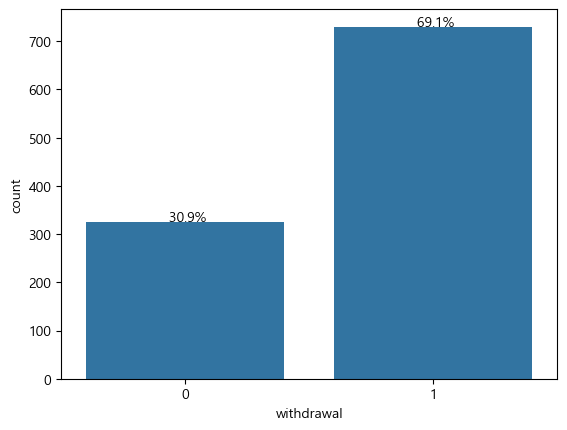

In [ ]:
# target(철회여부) 막대 그래프
ax = sns.countplot(x = 'withdrawal', data = train)

for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width()/2,
    y = patch.get_height()+len(train)*0.001,
    s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
               ha = 'center')

plt.rc('font', size=13)
plt.show()

In [ ]:
# 막대 그래프 시각화 함수
def write_text(ax, total_size):

    for patch in ax.patches:
        ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height()+len(train)*0.001,
            s = f'{(patch.get_height()/total_size)*100: 1.1f}%',
                    ha = 'center')

In [18]:
import matplotlib.gridspec as gridspec

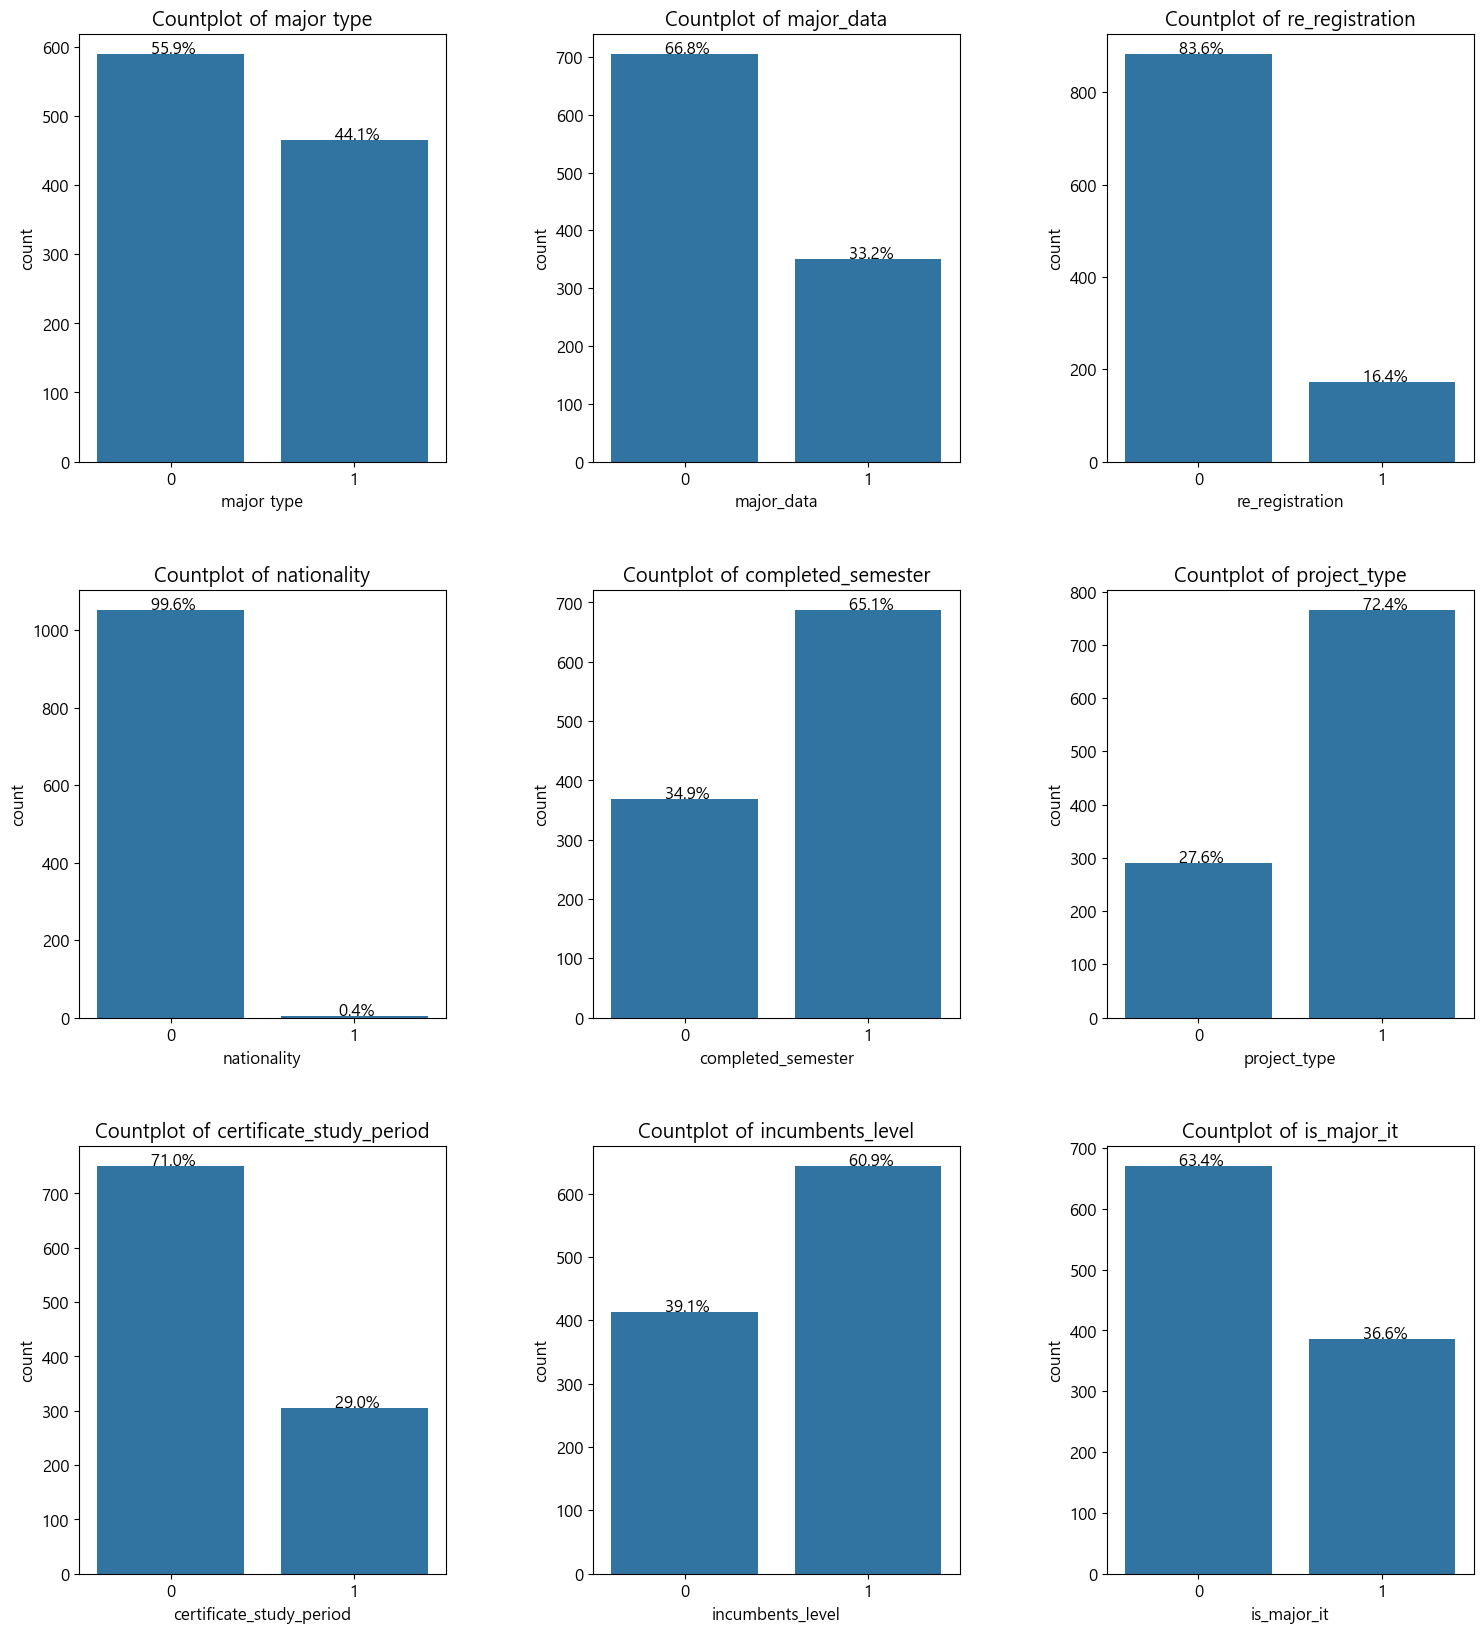

In [69]:
plt.figure(figsize = (18, 20))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 (w: 좌우, h: 상하 여백)
grid = gridspec.GridSpec(3, 3)

for index, col in enumerate(binary_columns):
    # 특정 ax에 그래프를 그림
    ax = plt.subplot(grid[index])
    sns.countplot(x = col, data = train, ax = ax)
    
    #text는 앞에서 만든 함수 활용
    write_text(ax, len(train))
    
    # 각 ax에 제목 달아주기
    ax.set_title(f'Countplot of {col}')

plt.rc('font', size = 12)
plt.show()

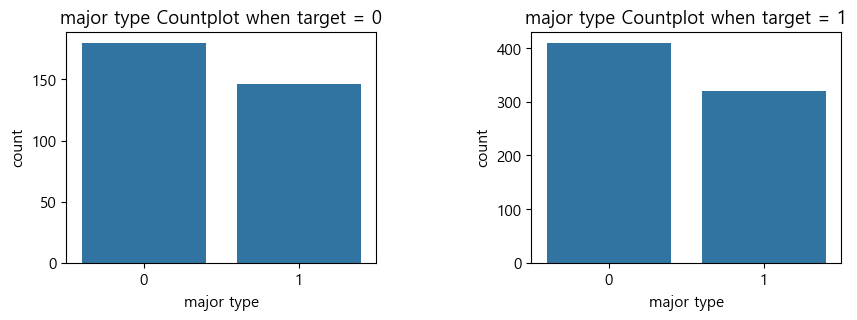

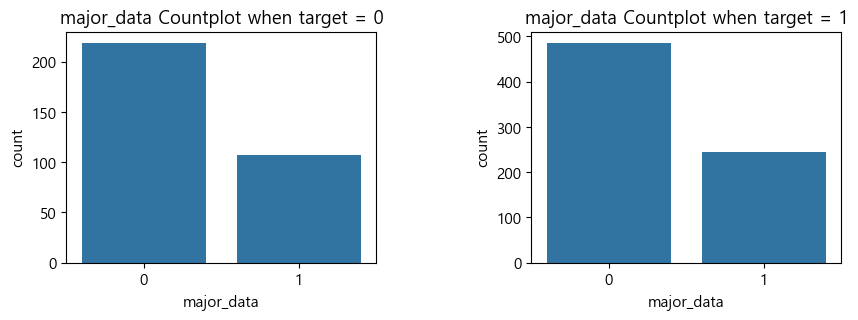

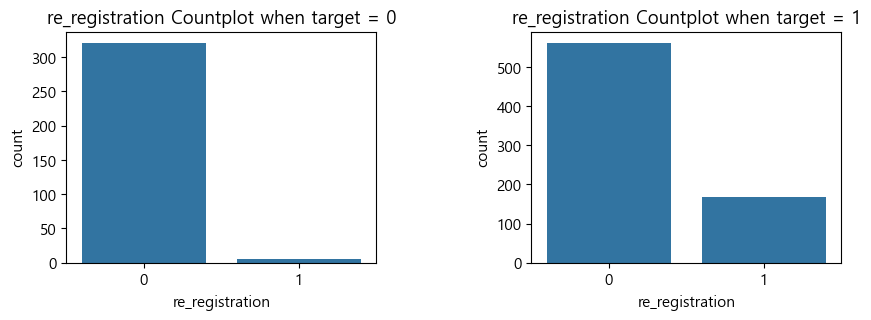

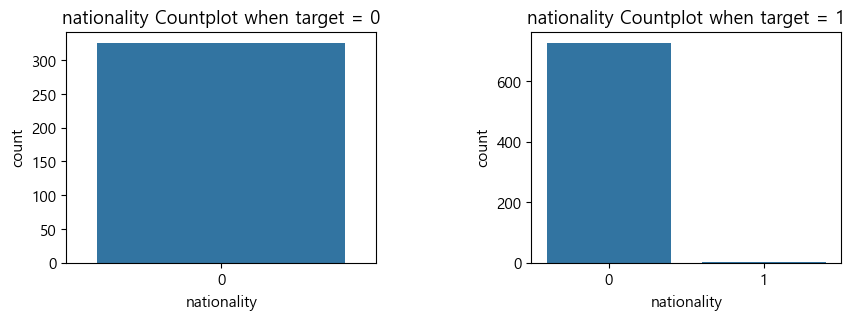

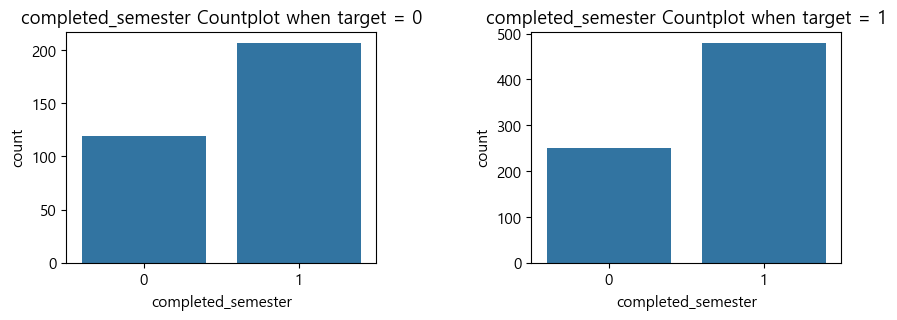

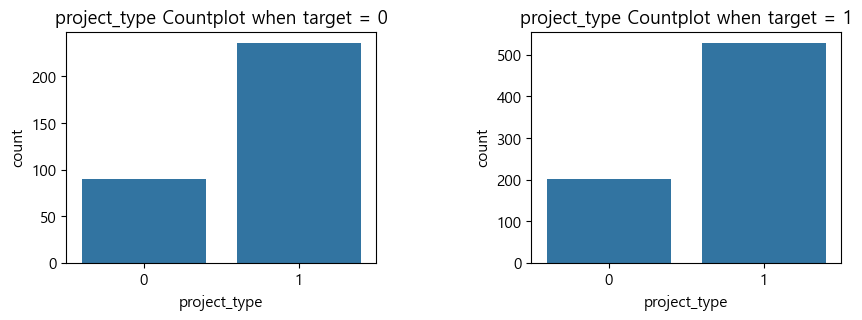

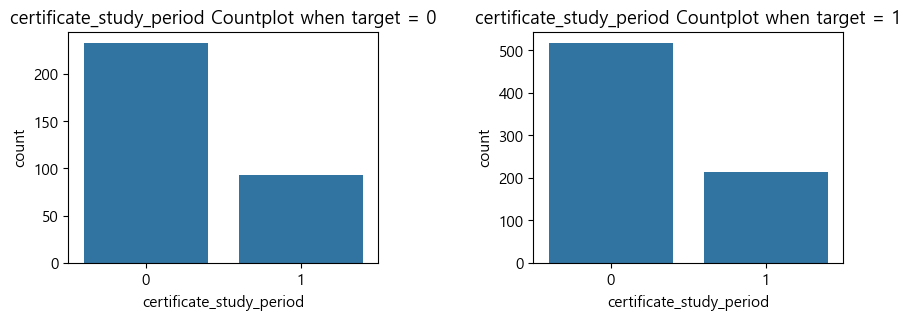

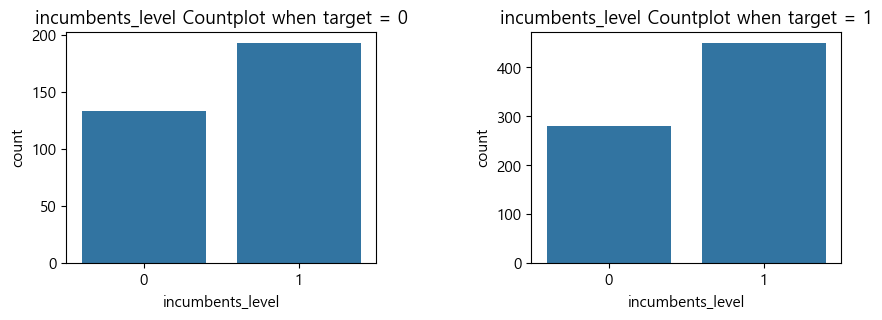

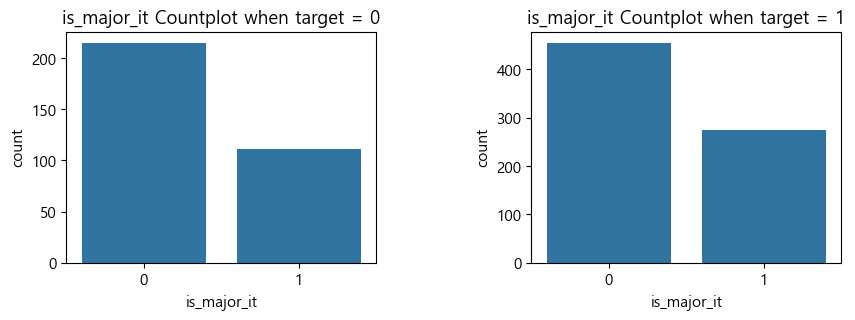

In [70]:
# target 데이터와 이진변수 비율
target0 = train.loc[train['withdrawal']==0]
target1 = train.loc[train['withdrawal']==1]

# bin_*별, 왼쪽은 target =0, 오른쪽은 target = 1 그래프 
plt.rc('font', size = 11)

# bin_* 의 * 숫자값을 i로 둔다 
for idx, col in enumerate(binary_columns):
    fig,ax = plt.subplots(1, 2, figsize = (10, 3))
    plt.subplots_adjust(wspace=0.5) #두 plot 간 사이 거리
    ax[0] = sns.countplot(x = col, data = target0, ax = ax[0]).set_title(f'{col} Countplot when target = 0')
    ax[1] = sns.countplot(x = col, data = target1, ax = ax[1]).set_title(f'{col} Countplot when target = 1')
    plt.show()

In [101]:
len(binary_columns)

8

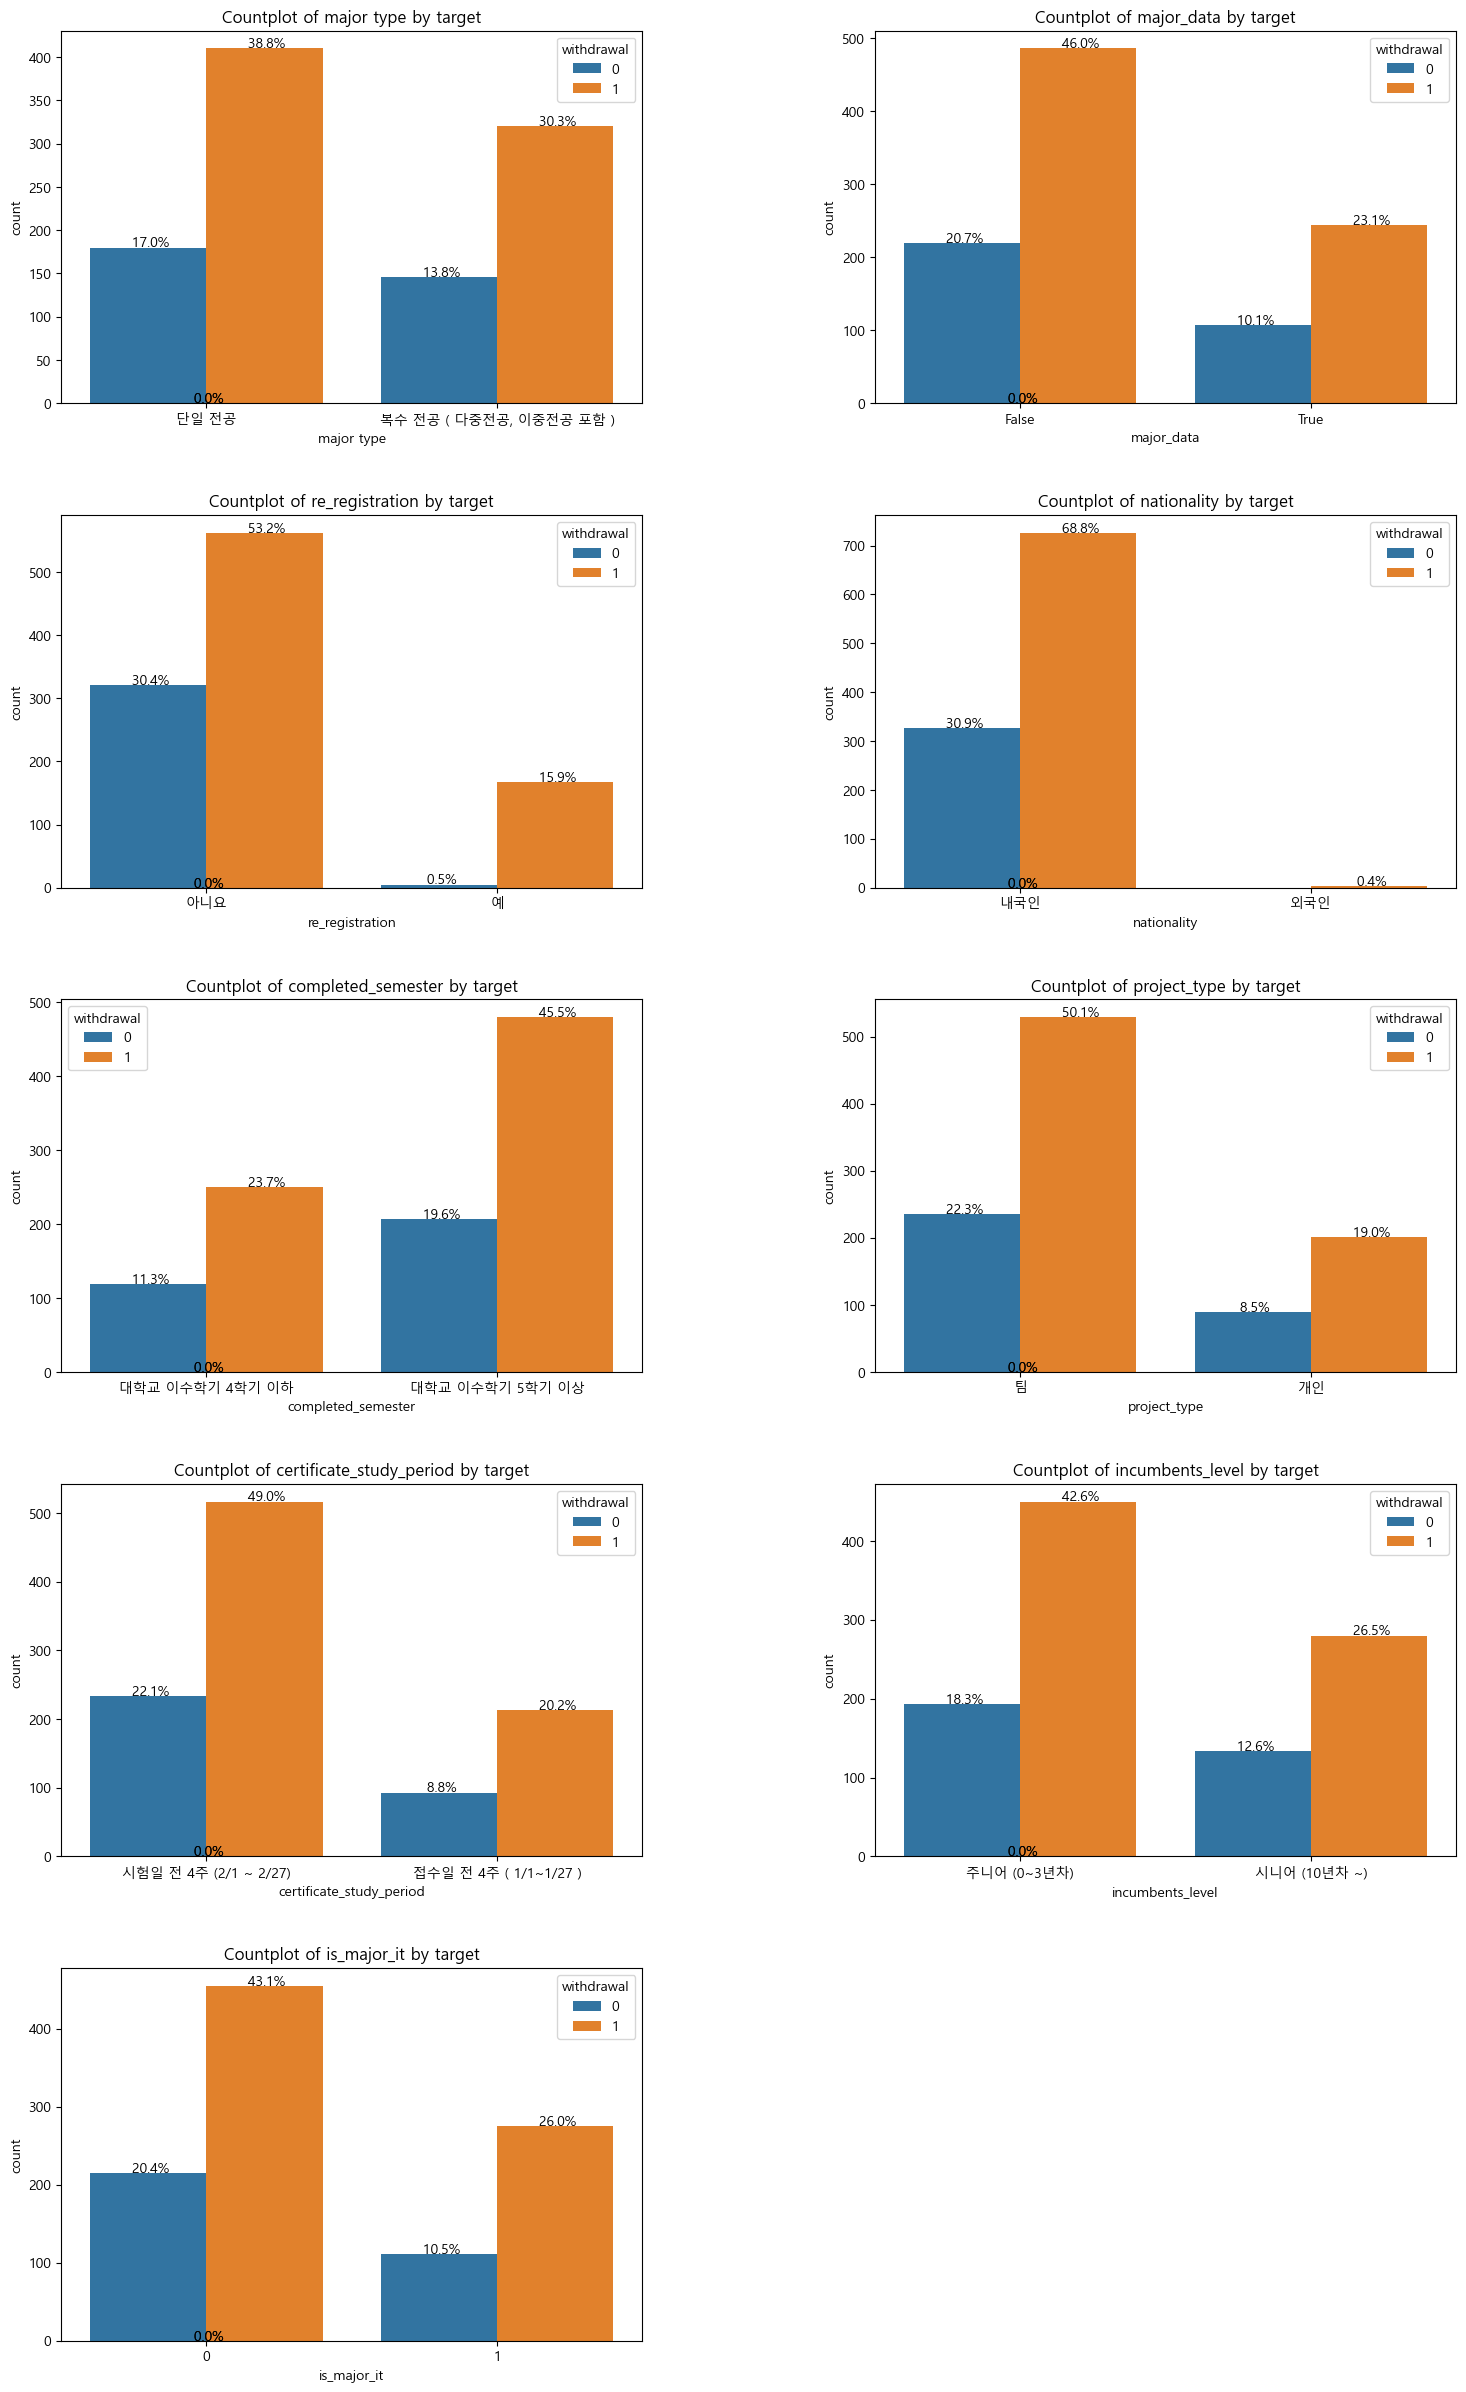

In [53]:
plt.figure(figsize = (18, 30))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 (w: 좌우, h: 상하 여백)
grid = gridspec.GridSpec(5, 2)

for idx, col in enumerate(binary_columns):
    ax = plt.subplot(grid[idx])
    sns.countplot(x = col, data = train, hue = 'withdrawal', ax = ax)

    #text는 앞에서 만든 함수 활용
    write_text(ax, len(train))
    
    # 각 ax에 제목 달아주기
    ax.set_title(f'Countplot of {col} by target')
    
plt.rc('font', size = 12)
plt.show()

In [104]:
for col in cate_columns:
    print(col, "의 고유값의 개수는:", train[col].nunique())

generation 의 고유값의 개수는: 1
school1 의 고유값의 개수는: 77
major1_1 의 고유값의 개수는: 11
major1_2 의 고유값의 개수는: 11
job 의 고유값의 개수는: 4
class1 의 고유값의 개수는: 9
inflow_route 의 고유값의 개수는: 9
whyBDA 의 고유값의 개수는: 7
what_to_gain 의 고유값의 개수는: 9
hope_for_group 의 고유값의 개수는: 3
major_field 의 고유값의 개수는: 51
desired_career_path 의 고유값의 개수는: 27
time_input 의 고유값의 개수는: 18
desired_job 의 고유값의 개수는: 90
certificate_acquisition 의 고유값의 개수는: 37
desired_certificate 의 고유값의 개수는: 108
desired_job_except_data 의 고유값의 개수는: 35
incumbents_lecture 의 고유값의 개수는: 8
incumbents_company_level 의 고유값의 개수는: 22
incumbents_lecture_type 의 고유값의 개수는: 3
incumbents_lecture_scale 의 고유값의 개수는: 11
incumbents_lecture_scale_reason 의 고유값의 개수는: 985
interested_company 의 고유값의 개수는: 531
expected_domain 의 고유값의 개수는: 68
onedayclass_topic 의 고유값의 개수는: 540


In [105]:
cate_columns = ['major1_1', 'major1_2', 'job', 'whyBDA', 'what_to_gain', 'hope_for_group']

C:\Users\yongchae\AppData\Local\Temp\ipykernel_18676\913678621.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x = col, data = train, ax = ax, color = 'skyblue', hue='withdrawal')
C:\Users\yongchae\AppData\Local\Temp\ipykernel_18676\913678621.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x = col, data = train, ax = ax, color = 'skyblue', hue='withdrawal')
C:\Users\yongchae\AppData\Local\Temp\ipykernel_18676\913678621.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x = col, data = train, ax = ax, color = 'skyblue', hue='withdrawal')
C:\Users\yongchae\AppData\Local\Temp\ipykernel_18676\913678621.py:8: FutureW

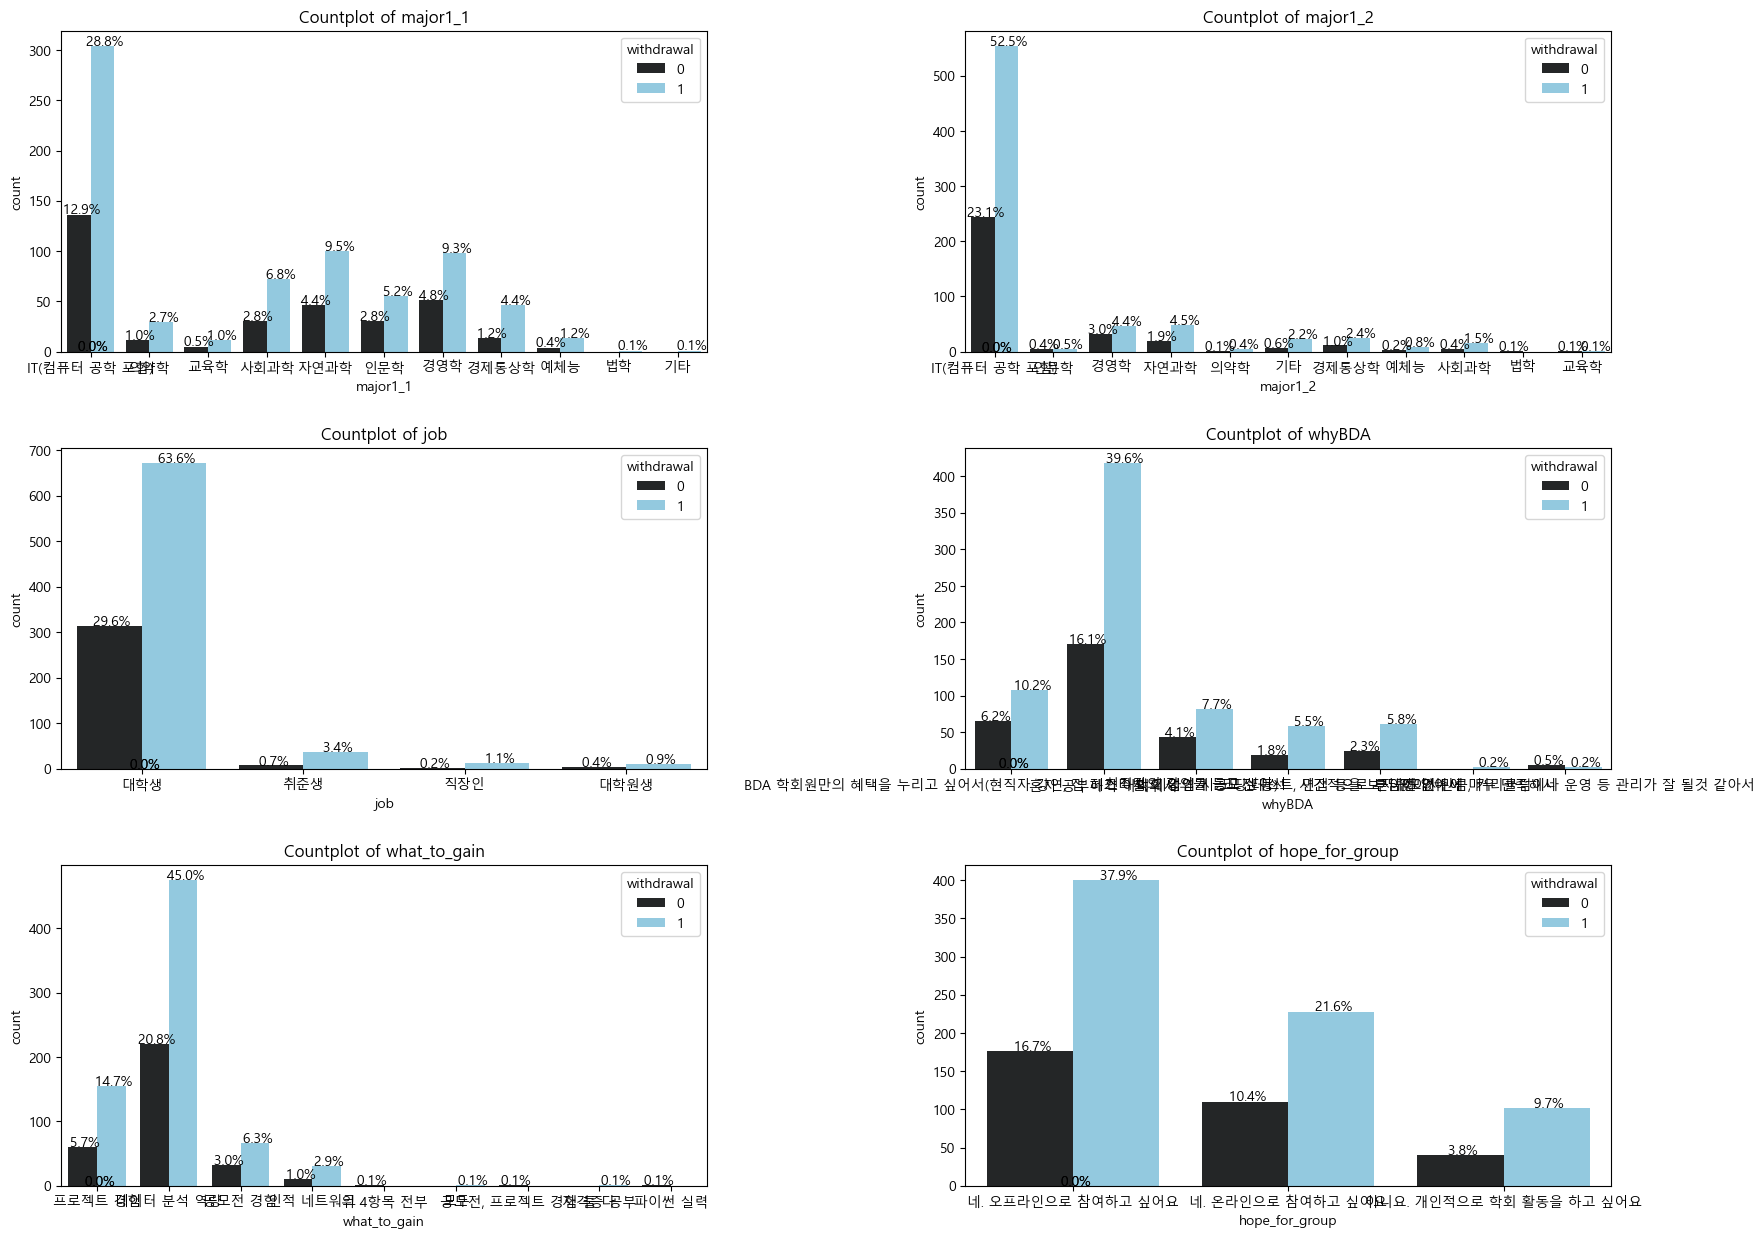

In [59]:
plt.figure(figsize = (20, 15))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 (w: 좌우, h: 상하 여백)
grid = gridspec.GridSpec(3, 2)

for idx, col in enumerate(cate_columns):
    # 특정 ax에 그래프를 그림
    ax = plt.subplot(grid[idx])
    sns.countplot(x = col, data = train, ax = ax, color = 'skyblue', hue='withdrawal')
    
    #text는 앞에서 만든 함수 활용
    write_text(ax, len(train))
    
    # 각 ax에 제목 달아주기
    ax.set_title(f'Countplot of {col}')

plt.rc('font', size = 10)
plt.show()

In [60]:
pd.crosstab(train['major1_1'], train['withdrawal'], normalize = 'index')*100

withdrawal,0,1
major1_1,,
IT(컴퓨터 공학 포함),30.909091,69.090909
경영학,34.228188,65.771812
경제통상학,22.033898,77.966102
교육학,31.250000,68.750000
기타,0.000000,100.000000
법학,0.000000,100.000000
사회과학,29.411765,70.588235
예체능,23.529412,76.470588
의약학,27.500000,72.500000


In [61]:
for col in cate_columns:
    df = pd.crosstab(train[col], train['withdrawal'], normalize = 'index')*100
    print(col,'의 교차분석표')
    print(df)
    print('---')

major1_1 의 교차분석표
withdrawal             0           1
major1_1                            
IT(컴퓨터 공학 포함)  30.909091   69.090909
경영학            34.228188   65.771812
경제통상학          22.033898   77.966102
교육학            31.250000   68.750000
기타              0.000000  100.000000
법학              0.000000  100.000000
사회과학           29.411765   70.588235
예체능            23.529412   76.470588
의약학            27.500000   72.500000
인문학            35.294118   64.705882
자연과학           31.506849   68.493151
---
major1_2 의 교차분석표
withdrawal              0          1
major1_2                            
IT(컴퓨터 공학 포함)   30.576441  69.423559
경영학             41.025641  58.974359
경제통상학           30.555556  69.444444
교육학             50.000000  50.000000
기타              20.689655  79.310345
법학             100.000000   0.000000
사회과학            20.000000  80.000000
예체능             20.000000  80.000000
의약학             20.000000  80.000000
인문학             44.444444  55.555556
자연과학            29.411765  70.588235


In [40]:
def get_crosstab(df, feature):
    cross = pd.crosstab(df[feature], df['withdrawal'], normalize = 'index')*100
    cross.reset_index(inplace = True)
    return cross

In [62]:
#---------------- 시각화 그래프 함수 생성 ---------------

def draw_two_ratio_plot(fea_list, df, row_num, col_num, size = (15, 18)):
    import matplotlib.gridspec as gridspec

    plt.figure(figsize = size)
    plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 
    grid = gridspec.GridSpec(row_num, col_num)

    #------------------------ 왼쪽 축
    for idx, col in enumerate(fea_list):
        # 크로스탭 생성
        ct = get_crosstab(df, col)
    
        # 특정 ax에 그래프를 그림
        ax = plt.subplot(grid[idx])
        sns.countplot(x = col, data = df, ax = ax, color = 'skyblue', order = ct[col].values)
    
        #text는 앞에서 만든 함수 활용
        write_text(ax, len(df))
    
        # 각 ax에 제목 달아주기
        ax.set_title(f'Distribution of {col}')
    
    
    #----------------------- 오른쪽 축
        # 이중 축 생성후 pointplot을 그림 
        ax2 = ax.twinx()
        ax2 = sns.pointplot(x = ct[col], y = ct[1], color = 'black', order = ct[col].values) # ct[1] 은 target =1 의 비율 
    
        # y축 범위 설정 - 좀 넉넉하게 잡아줌 
        ax2.set_ylim(ct[1].min()-5, ct[1].max()*1.1)
    
        # y축 이름 달아주기
        ax2.set_ylabel('Target = 1 Ratio')


    plt.rc('font', size = 10)
    plt.show()

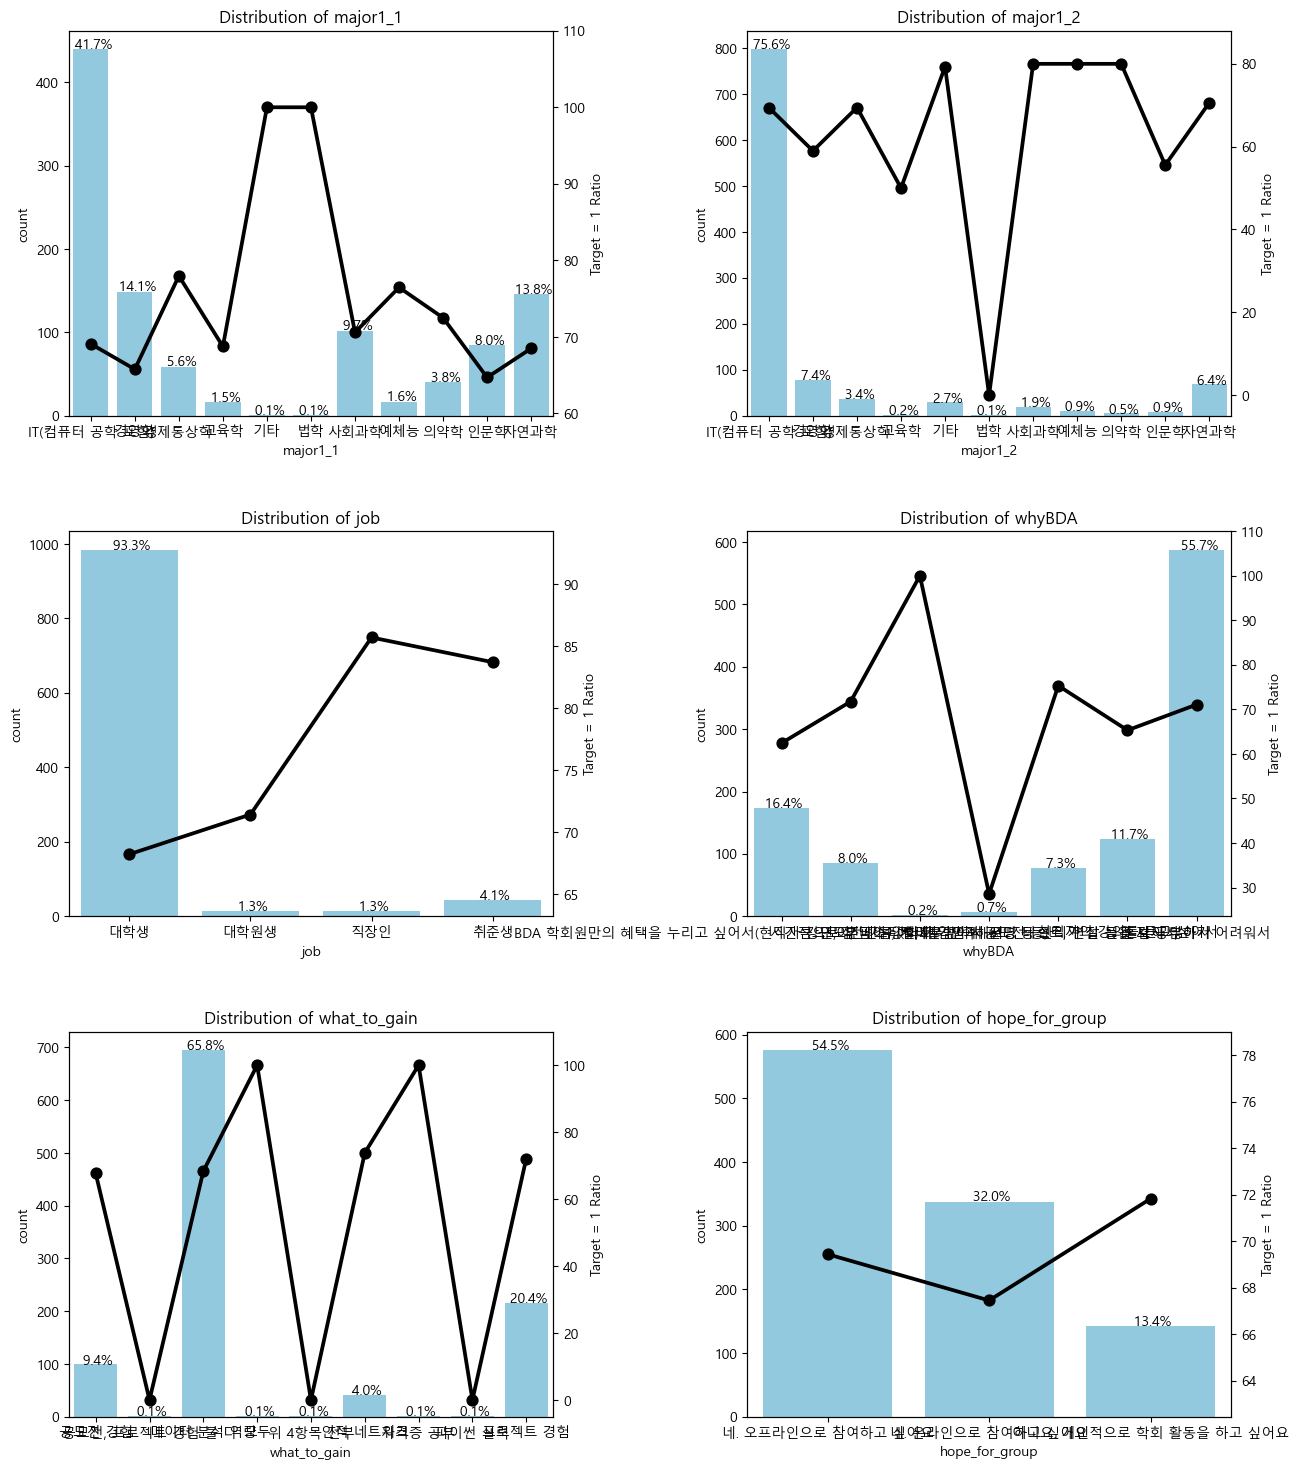

In [63]:
# 그래프 그리기
draw_two_ratio_plot(cate_columns, train, 3, 2)

In [65]:
display(train.head(2))
display(test.head(2))

,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,re_registration,inflow_route,whyBDA,what_to_gain,hope_for_group,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,certificate_study_period,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,onedayclass_topic,withdrawal,is_major_it
0,TRAIN_0000,8,3e0057be3ecde495d1d6aab0bdc3092cce94440a6a4f68...,단일 전공,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,4,아니요,에브리타임,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",프로젝트 경험,네. 오프라인으로 참여하고 싶어요,공학 (컴퓨터 공학 제외),취업,대학교 이수학기 4학기 이하,팀,4.5,데이터 엔지니어,없음,"SQLD, 정보처리기사",시험일 전 4주 (2/1 ~ 2/27),개발,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),"국내 대기업 IT 계열 (금융, 제조 ...)","온,오프라인 동시",3~50명 내외의 강의 리스너와 1명의 현직자,인원이 너무 많지 않아야 편하게 들을 수 있어서,삼성이나 하이닉스,AI,C++ 응용,1,0
1,TRAIN_0001,8,c7c76d1a4c9d719d17c899a3ca9de153452a22163fe083...,"복수 전공 ( 다중전공, 이중전공 포함 )",IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,4,아니요,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,IT (컴퓨터 공학 포함),취업,대학교 이수학기 5학기 이상,팀,2.0,인공지능 전문가,없음,"ADsP, SQLD, 빅데이터 분석 기사",시험일 전 4주 (2/1 ~ 2/27),AI,주니어 (0~3년차),직무 강의 (예시: 실무 진행 방식 및 직무 준비생을 위한 팁),국내 빅테크 IT 계열 (네카쿠라배당토),"온,오프라인 동시",10명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있고 질문 하기 쉽다.,네이버,AI,.,1,1


,ID,generation,school1,major type,major1_1,major1_2,major_data,job,class1,re_registration,inflow_route,whyBDA,what_to_gain,hope_for_group,major_field,desired_career_path,completed_semester,project_type,time_input,desired_job,certificate_acquisition,desired_certificate,certificate_study_period,desired_job_except_data,incumbents_level,incumbents_lecture,incumbents_company_level,incumbents_lecture_type,incumbents_lecture_scale,incumbents_lecture_scale_reason,interested_company,expected_domain,onedayclass_topic,is_major_it
0,TEST_0000,9,88fb2803503cc7db7e1e8caf8f4e1e5c517d0d8669fffa...,단일 전공,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,4,아니요,에브리타임,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",데이터 분석 역량,네. 오프라인으로 참여하고 싶어요,IT (컴퓨터 공학 포함),취업,대학교 이수학기 5학기 이상,팀,2.0,B. 데이터 분석가,없음,ADsP,접수일 전 5주,"B. 기획 / 전략 / 경영 직무, D. 소프트웨어 개발자",주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),해외 기업 (빅테크),온라인,3~50명 내외의 강의 리스너와 1명의 현직자,적당한 인원이 있어야 더 집중할 수 있어어,"유튜브, 인스타그램, 그린피스",C. 제조업,머신러닝 / 딥러닝 응용,1
1,TEST_0001,9,88fb2803503cc7db7e1e8caf8f4e1e5c517d0d8669fffa...,단일 전공,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),False,대학생,1,아니요,에브리타임,혼자 공부하기 어려워서,프로젝트 경험,네. 오프라인으로 참여하고 싶어요,IT (컴퓨터 공학 포함),대학원 진학,대학교 이수학기 5학기 이상,팀,2.0,C. 데이터 사이언티스트,없음,"ADsP, SQLD, 빅데이터 분석 기사",시험일 전 4주,D. 소프트웨어 개발자,주니어 (0~3년차),커리어 패스 과정 (예시: 비전공자/전공자의 취업 준비 및 이직 과정),스타트업 C-level,온라인,3~50명 내외의 강의 리스너와 1명의 현직자,인원이 적어야 집중할 수 있어서,콕스웨이브,"R. 예술, 스포츠 및 여가관련 서비스업","Python 응용, 데이터 시각화 (Matplotlib, Seaborn 등), 머신...",1


### 변수 인코딩

In [374]:
binary_columns 

['major_data',
 're_registration',
 'project_type',
 'is_major_it',
 'completed_semester']

In [261]:
cate_columns

['major1_1', 'major1_2', 'job', 'whyBDA', 'hope_for_group', 'what_to_gain']

In [375]:
bin_train = train[binary_columns]
bin_test = test[binary_columns]
bin_test.head()

,major_data,re_registration,project_type,is_major_it,completed_semester
0,False,아니요,팀,1,대학교 이수학기 5학기 이상
1,False,아니요,팀,1,대학교 이수학기 5학기 이상
2,False,아니요,팀,1,대학교 이수학기 5학기 이상
3,False,아니요,개인,1,대학교 이수학기 5학기 이상
4,False,아니요,팀,1,대학교 이수학기 5학기 이상


In [376]:
# 이진변수 0, 1로 변환
label_encoders = {}
for col in binary_columns:
    if col not in bin_train.columns:
        continue
    bin_train[col] = bin_train[col].astype(str) # True, False 자체를 문자열로 변환
    bin_test[col] = bin_test[col].astype(str)
    
    le = LabelEncoder()
    le = le.fit(bin_train[col])
    bin_train[col] = le.transform(bin_train[col])
    
    for label in np.unique(test[col]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    
    bin_test[col] = le.transform(bin_test[col])
    label_encoders[col] = le

C:\Users\yongchae\AppData\Local\Temp\ipykernel_18676\1628942506.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_train[col] = bin_train[col].astype(str) # True, False 자체를 문자열로 변환
C:\Users\yongchae\AppData\Local\Temp\ipykernel_18676\1628942506.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_test[col] = bin_test[col].astype(str)
C:\Users\yongchae\AppData\Local\Temp\ipykernel_18676\1628942506.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [326]:
bin_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   major_data       788 non-null    int64
 1   re_registration  788 non-null    int64
 2   project_type     788 non-null    int64
 3   is_major_it      788 non-null    int64
dtypes: int64(4)
memory usage: 24.8 KB


In [307]:
cate_train = train[cate_columns]
cate_test = test[cate_columns]
cate_test.head()

,major1_1,major1_2,job,whyBDA,hope_for_group,what_to_gain
0,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),대학생,"큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",네. 오프라인으로 참여하고 싶어요,데이터 분석 역량
1,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),대학생,혼자 공부하기 어려워서,네. 오프라인으로 참여하고 싶어요,프로젝트 경험
2,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),취준생,혼자 공부하기 어려워서,네. 오프라인으로 참여하고 싶어요,데이터 분석 역량
3,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),취준생,혼자 공부하기 어려워서,네. 온라인으로 참여하고 싶어요,데이터 분석 역량
4,IT(컴퓨터 공학 포함),IT(컴퓨터 공학 포함),대학생,"BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",네. 오프라인으로 참여하고 싶어요,프로젝트 경험


In [308]:
train['withdrawal']

0       1
1       1
2       1
3       0
4       1
       ..
1051    1
1052    1
1053    0
1054    1
1055    1
Name: withdrawal, Length: 1056, dtype: int64

In [377]:
train_target = train['withdrawal']

#### 더미변수 생성

In [346]:
def dummy_encoding(train_df, test_df, col_list, bin_train, bin_test):
    cate_train = train_df[col_list]
    cate_test = test_df[col_list]

    train_enc = pd.get_dummies(cate_train)
    test_enc = pd.get_dummies(cate_test)

    test_enc = test_enc.reindex(columns=train_enc.columns, fill_value=0)

    all_train = pd.concat([bin_train, train_enc], axis=1)
    all_test = pd.concat([bin_test, test_enc], axis=1)

    return all_train, all_test


In [378]:
all_train, all_test = dummy_encoding(train, test, cate_columns, bin_train, bin_test)

In [379]:
all_train

,major_data,re_registration,project_type,is_major_it,completed_semester,major1_1_IT(컴퓨터 공학 포함),major1_1_경영학,major1_1_경제통상학,major1_1_교육학,major1_1_기타,major1_1_법학,major1_1_사회과학,major1_1_예체능,major1_1_의약학,major1_1_인문학,major1_1_자연과학,major1_2_IT(컴퓨터 공학 포함),major1_2_경영학,major1_2_경제통상학,major1_2_교육학,major1_2_기타,major1_2_법학,major1_2_사회과학,major1_2_예체능,major1_2_의약학,major1_2_인문학,major1_2_자연과학,job_대학생,job_대학원생,job_직장인,job_취준생,"whyBDA_BDA 학회원만의 혜택을 누리고 싶어서(현직자 강연, 잡 페스티벌, 기업연계 공모전 등)",whyBDA_시간적으로 부담이 없어서,whyBDA_이전 기수에 매우 만족해서,"whyBDA_큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서","whyBDA_학회 가입 시 코딩 테스트, 면접 등을 보지 않아서",whyBDA_현직자의 강의를 듣고 싶어서,whyBDA_혼자 공부하기 어려워서,hope_for_group_네. 오프라인으로 참여하고 싶어요,hope_for_group_네. 온라인으로 참여하고 싶어요,hope_for_group_아니요. 개인적으로 학회 활동을 하고 싶어요,what_to_gain_공모전 경험,"what_to_gain_공모전, 프로젝트 경험 둘 다",what_to_gain_데이터 분석 역량,what_to_gain_모두,what_to_gain_위 4항목 전부,what_to_gain_인적 네트워크,what_to_gain_자격증 공부,what_to_gain_파이썬 실력,what_to_gain_프로젝트 경험
0,0,0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
1,0,0,1,1,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
2,1,0,1,1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False
3,1,0,1,0,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False
4,0,0,1,1,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,0,0,1,1,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False
1052,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False
1053,0,0,1,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False
1054,0,0,1,0,1,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False


#### 원핫인코딩

In [322]:
def cate_encoding(train_df, test_df, col_list, bin_train, bin_test):
    
    cate_train = train_df[col_list]
    cate_test = test_df[col_list]

    from sklearn.preprocessing import OneHotEncoder

    encoder = OneHotEncoder()
    cate_train_enc = encoder.fit_transform(cate_train)
    cate_test_enc = encoder.transform(cate_test)

    from scipy import sparse

    all_train = sparse.hstack([sparse.csr_matrix(bin_train), cate_train_enc],format = 'csr')
    all_test = sparse.hstack([sparse.csr_matrix(bin_test), cate_test_enc],format = 'csr')

    return all_train, all_test

In [323]:
all_train, all_test = cate_encoding(train, test, cate_columns, bin_train, bin_test)

ValueError: Found unknown categories ['IT (컴퓨터 공학 포함)'] in column 1 during transform

In [321]:
all_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6019 stored elements and shape (788, 48)>

### 회귀

In [160]:
from sklearn.model_selection import train_test_split

#### PCA

In [429]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # 2차원으로 축소
pca_result = pca.fit_transform(all_train)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

print(pca_df)
print('설명된 분산 비율:', pca.explained_variance_ratio_)

           PC1       PC2       PC3
0     0.970887 -0.316036 -0.380327
1     1.173951 -0.148182 -0.177499
2     0.928984  0.747977  0.908806
3    -0.156474  0.856826 -0.489955
4     1.020726 -0.101086  0.100572
...        ...       ...       ...
1051 -0.544491  0.637792 -0.000166
1052  0.139618  1.246447 -0.165891
1053 -0.330432 -1.022896  0.640652
1054 -0.796246 -0.028625 -0.661554
1055  0.142440 -1.174683 -0.280171

[1056 rows x 3 columns]
설명된 분산 비율: [0.12557316 0.10639753 0.08581089]


#### 로지스틱

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(all_train, train_target, stratify = train_target, random_state=42)
print(X_train.shape, X_val.shape)

(792, 40) (264, 40)


In [183]:
y_train.shape

(792,)

In [181]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]

# 성능 확인(AUC) - 주의점. predict_proba로 뽑힌 확률값으로 비교해야 함
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

np.float64(0.6028879656928438)

In [180]:
pred = model.predict(all_test)

In [211]:
def logistic_train(all_train, train_target, tsize=0.2, n_iter=100):

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import f1_score

    X_train, X_val, y_train, y_val = train_test_split(all_train, train_target, stratify = train_target, 
                                                      random_state=42, test_size=tsize)
    print('X_train의 shape:', X_train.shape)
    print('X_val의 shape:', X_val.shape)

    model = LogisticRegression(random_state = 42, max_iter=n_iter)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    
    print('')
    print('f1 score: {:.4f}'.format(f1_score(y_val, y_pred)))

In [269]:
logistic_train(all_train, train_target, n_iter = 200)

X_train의 shape: (844, 49)
X_val의 shape: (212, 49)

f1 score: 0.7907


##### 로지스틱 튜닝

In [388]:
def logistic_tuning(all_train, train_target, params):

    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV

    model = LogisticRegression(random_state = 42)
    grid = GridSearchCV(model, params, scoring = 'f1', cv = 7)
    grid.fit(all_train, train_target)

    print('best params:', grid.best_params_)
    print('best score:', grid.best_score_)

    return grid.best_estimator_

In [389]:
%%time
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1]},
]
best_model = logistic_tuning(pca_df, train_target, params = param_grid)

best params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
best score: 0.8174668194049273
CPU times: total: 797 ms
Wall time: 618 ms


In [430]:
%%time
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.05, 0.1, 0.125, 0.15, 0.5], 'max_iter': [100, 200, 300, 400, 500, 1000]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.05, 0.1, 0.125, 0.15, 0.5], 'max_iter': [100, 200, 300, 400, 500, 1000]},
]
best_model = logistic_tuning(pca_df, train_target, params = param_grid)

best params: {'C': 0.05, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
best score: 0.8174668194049273
CPU times: total: 8.84 s
Wall time: 7.56 s


##### 로지스틱 K-fold

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

model = LogisticRegression(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(all_train):
    X_train, X_val = all_train[train_index], all_train[val_index]
    y_train, y_val = train_target[train_index], train_target[val_index]
    
    # 모델 학습 및 평가
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

In [215]:
f1_score(y_val, y_pred)

0.8184438040345822

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

model = RandomForestClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(all_train):
    X_train, X_val = all_train[train_index], all_train[val_index]
    y_train, y_val = train_target[train_index], train_target[val_index]
    
    # 모델 학습 및 평가
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

f1_score(y_val, y_pred)

0.7621951219512195

#### 랜덤포레스트

In [355]:
def random_tuning(all_train, train_target, params):

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV

    model = RandomForestClassifier(random_state = 42)
    grid = GridSearchCV(model, params, scoring = 'f1', cv = 5)
    grid.fit(all_train, train_target)

    print('best params:', grid.best_params_)
    print('best score:', grid.best_score_)

    return grid.best_estimator_

In [382]:
%%time
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

best_rf_model = random_tuning(all_train, train_target, params)

best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best score: 0.8169933659832589
CPU times: total: 57.5 s
Wall time: 1min


#### SVM

In [435]:
def svm_tuning(all_train, train_target, params):

    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    # from sklearn.metrics import accuracy_score

    model = SVC(random_state=42)
    grid = GridSearchCV(model, params, scoring='accuracy', cv=7)
    grid.fit(all_train, train_target)

    print('best params:', grid.best_params_)
    print('best score:', grid.best_score_)

    return grid.best_estimator_

In [436]:
params = {
    'kernel': ['linear', 'rbf', 'poly'],    # 커널 타입 (선형, RBF, 다항식)
    'C': [0.1, 1, 10, 100],                 # 정규화 파라미터 (클수록 과적합 위험)
    'gamma': ['scale', 'auto'],             # RBF, poly 커널 시 영향 (scale: 기본값, auto: 1/특성수)
    'degree': [3, 4, 5]                     # 다항 커널(poly)에서 차수 (kernel이 poly일 때만 의미 있음)
}

best_rf_model = svm_tuning(pca_df, train_target, params)

best params: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
best score: 0.6931882686849574


In [424]:
importance = best_rf_model.coef_[0]
importance

array([ 1.37864190e-04,  8.21908428e-04, -9.49862907e-05,  1.81573828e-04,
       -3.58002950e-05, -9.14507985e-05, -1.47833005e-04,  1.01106972e-04,
        2.08411775e-04,  0.00000000e+00,  0.00000000e+00, -5.21365548e-06,
        1.55200155e-04,  2.82466618e-05, -1.39771469e-04, -1.08696634e-04,
        1.11583475e-02,  1.07714453e-02,  1.10286507e-02,  0.00000000e+00,
        1.16376272e-02, -1.00000000e-01,  1.12519528e-02,  1.08032003e-02,
        1.15904801e-02,  1.05884158e-02,  1.11698803e-02, -1.30119323e-04,
        4.29011231e-05,  1.93478430e-04, -1.06260230e-04,  4.99129811e-02,
        5.02401004e-02,  4.90012961e-02, -3.00000000e-01,  5.03050916e-02,
        5.02603285e-02,  5.02802023e-02,  8.07102851e-05,  6.94487825e-06,
       -8.76551634e-05,  4.97842344e-02, -1.00000000e-01,  5.01586804e-02,
        5.03863884e-02, -1.00000000e-01,  5.01583736e-02,  4.94214883e-02,
       -1.00000000e-01,  5.00908349e-02])

#### 의사결정나무

In [417]:
def DT_regression(all_train, train_target, tsize=0.2):

    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import f1_score

    X_train, X_val, y_train, y_val = train_test_split(all_train, train_target, stratify = train_target, 
                                                      random_state=42, test_size=tsize)
    print('X_train의 shape:', X_train.shape)
    print('X_val의 shape:', X_val.shape)

    model = DecisionTreeClassifier(random_state = 42, max_depth = 5)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    
    print('')
    print('f1 score: {:.4f}'.format(f1_score(y_val, y_pred)))

    print(model.score(X_train, y_train))
    print(model.score(X_val, y_val))

    return model


In [418]:
DT_model = DT_regression(all_train, train_target)

X_train의 shape: (844, 50)
X_val의 shape: (212, 50)

f1 score: 0.8045
0.7191943127962085
0.6745283018867925


In [419]:
imp = pd.DataFrame({'feature': all_train.columns, 'coefficient': DT_model.feature_importances_})
imp = imp.sort_values(by = 'coefficient', ascending= False)
imp

,feature,coefficient
1,re_registration,0.518250
17,major1_2_경영학,0.072308
11,major1_1_사회과학,0.070202
27,job_대학생,0.055993
34,"whyBDA_큰 규모인 만큼, 커리큘럼이나 운영 등 관리가 잘 될것 같아서",0.048776
15,major1_1_자연과학,0.045689
7,major1_1_경제통상학,0.032373
40,hope_for_group_아니요. 개인적으로 학회 활동을 하고 싶어요,0.030770
37,whyBDA_혼자 공부하기 어려워서,0.029505
3,is_major_it,0.029305


### 제출 생성

In [432]:
pca_test_result = pca.transform(all_test)

pca_test_df = pd.DataFrame(pca_test_result, columns=['PC1', 'PC2', 'PC3'])

In [433]:
pred = best_rf_model.predict(pca_test_df)

In [434]:
submission = pd.read_csv('dacon_bda/sample_submission.csv')
submission['withdrawal'] = pred
submission.to_csv('dacon_bda/submit.csv', index = False)

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

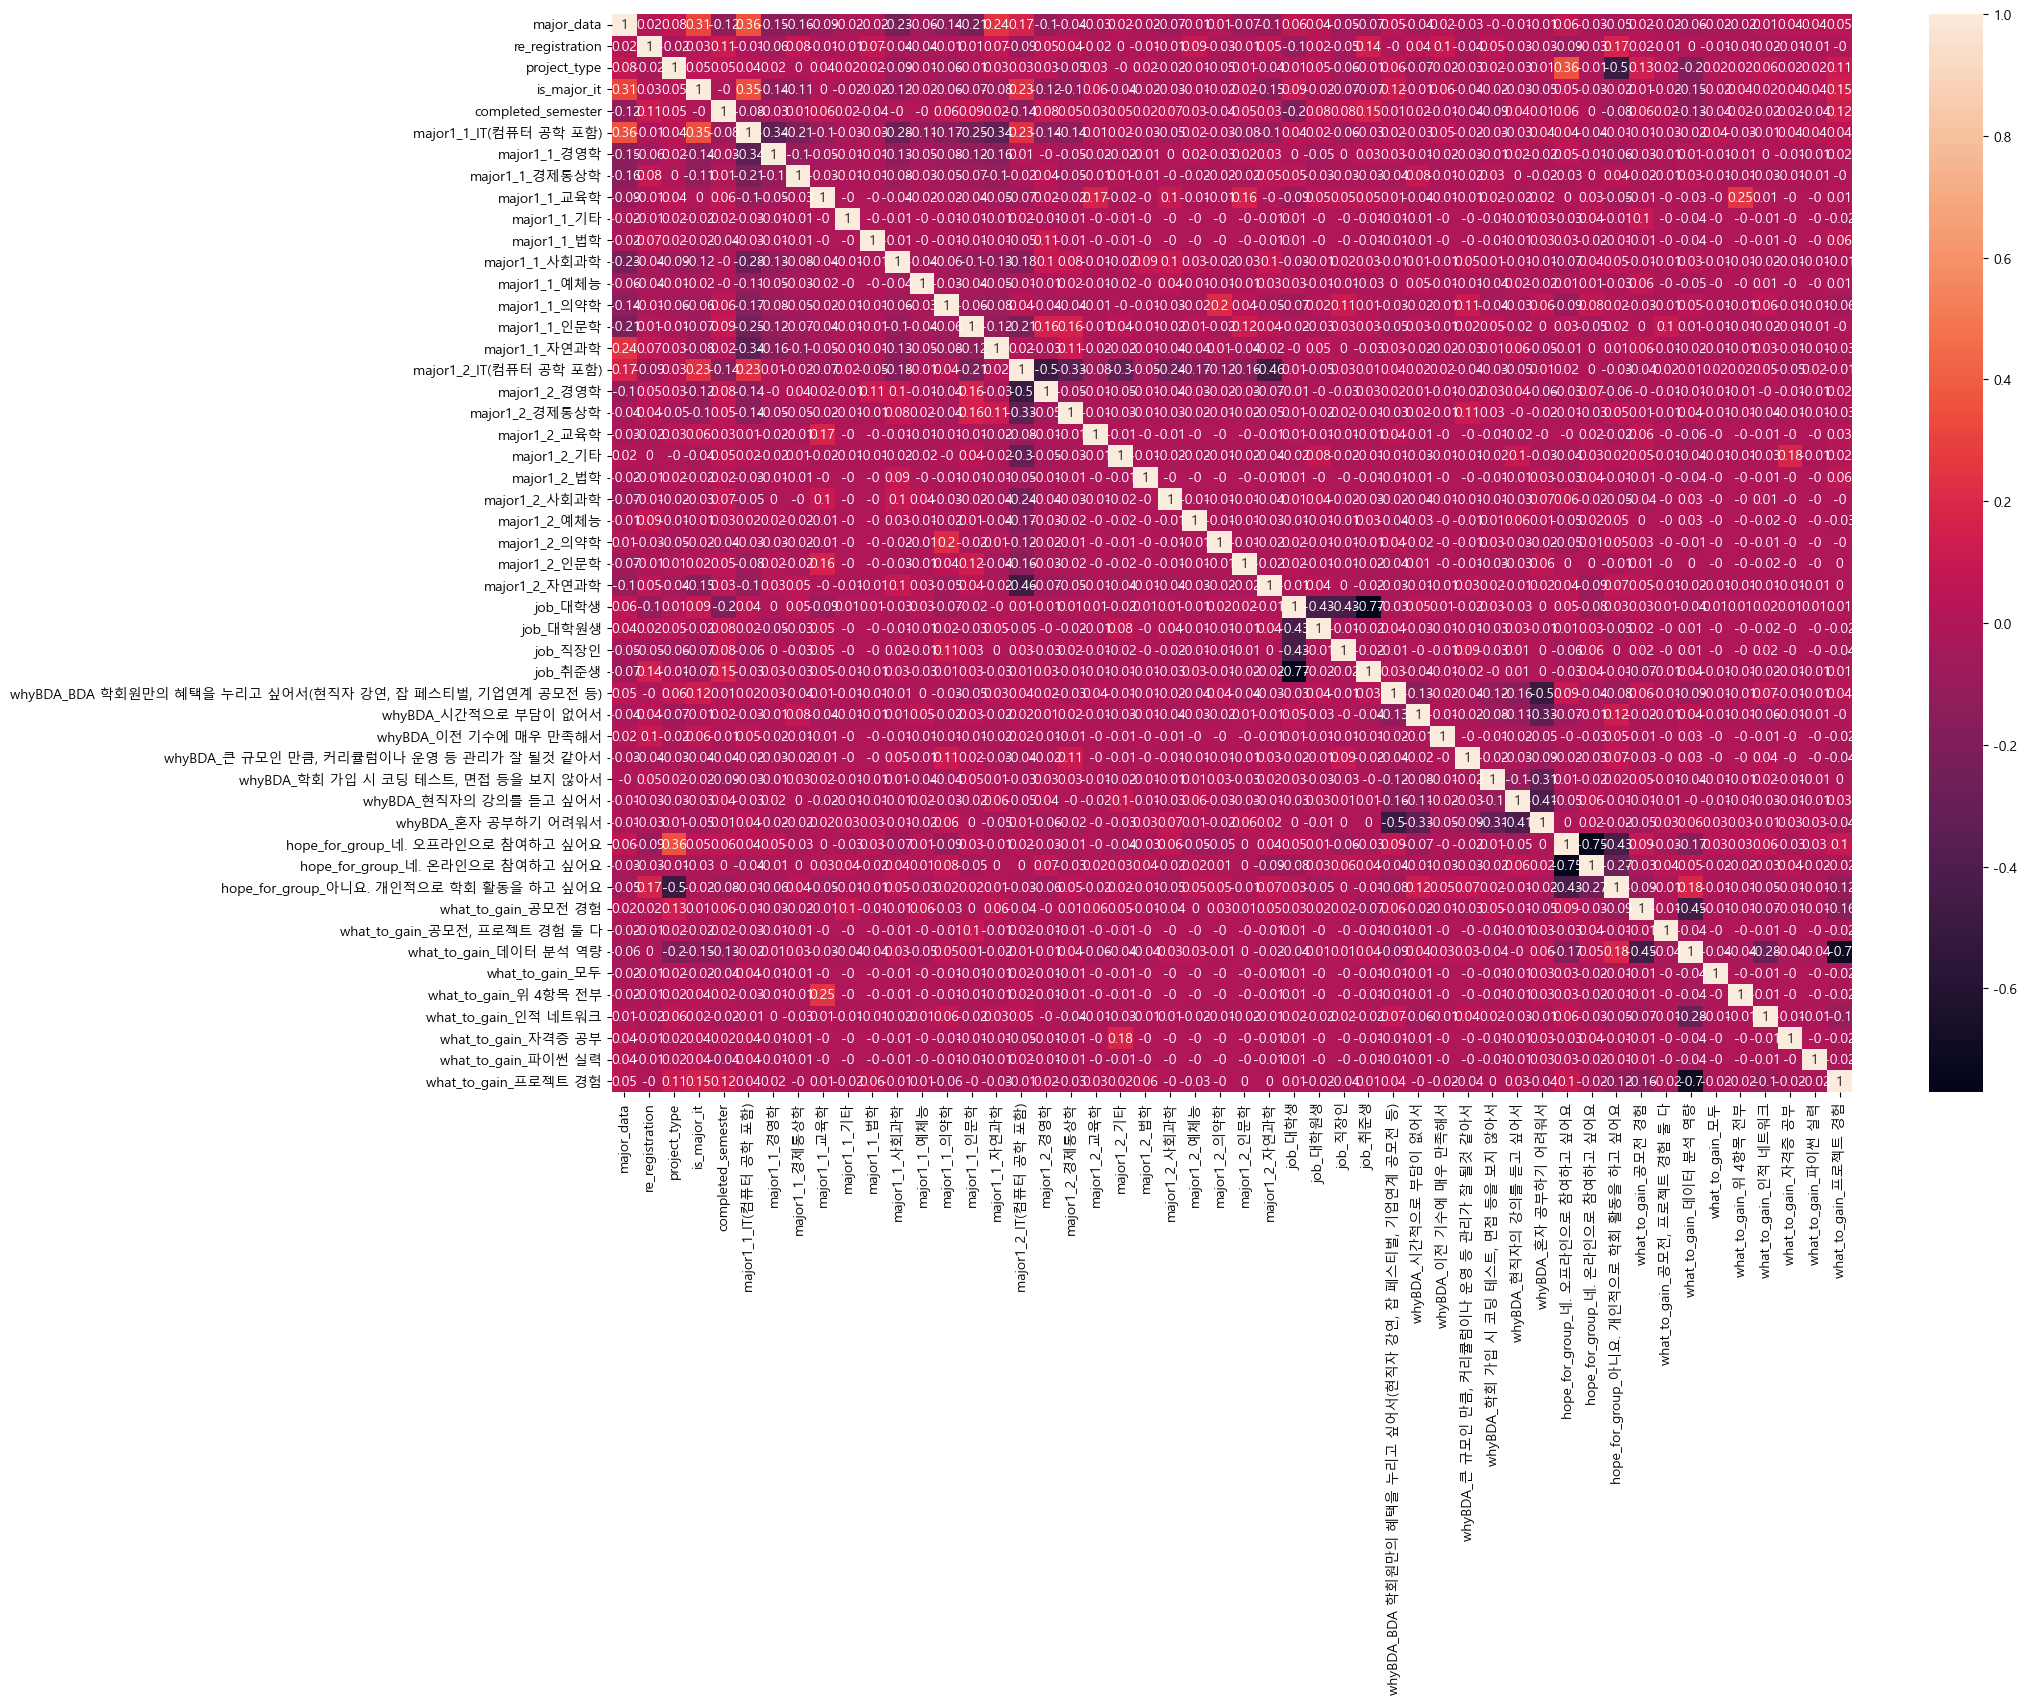

In [427]:
plt.figure(figsize=(20,14))
sns.heatmap(all_train.corr().round(2), annot = True)